<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Регрессия" data-toc-modified-id="Регрессия-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Регрессия</a></span></li><li><span><a href="#Задание-1:-Очистка" data-toc-modified-id="Задание-1:-Очистка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задание 1: Очистка</a></span></li><li><span><a href="#Задание-2:-Модель" data-toc-modified-id="Задание-2:-Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Задание 2: Модель</a></span></li><li><span><a href="#Классификация" data-toc-modified-id="Классификация-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Классификация</a></span></li><li><span><a href="#Задание-1:-Определение-гендера" data-toc-modified-id="Задание-1:-Определение-гендера-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Задание 1: Определение гендера</a></span></li><li><span><a href="#Задание-2:-Определение-класса" data-toc-modified-id="Задание-2:-Определение-класса-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Задание 2: Определение класса</a></span></li></ul></div>

# Регрессия

С 1ого октября отменяется НДС на бриллианты, теперь они становятся новым инвестиционным инструментом. Давайте сделаем модель ценообразования для них.

Скачайте датасет diamonds.csv

В нем представлены характеристики бриллиантов и их цены с сайта jamesallen (B2C площадка) с 2022-07-01

Описание полей

fluor - флуорисценуия (свойство камня светиться в лучах ультр)+
symmetry - показатель симметричности+
platform - название платформы, где был размещен камень+
quality_group - составной показатель из cut polish symmetry
size_group - каратно весовая группа
big_size_group - каратно-весовая группа
shape - форма+
color - цвет+
clarity - чистота+
cut - качество огранки (может быть только у круглых камней)+
polish - полировка+
id - номер камня+
date - дата+
price - цена+
carat - кол-во карат+
tablepercent - размер площадки по отношению ширине
price_per_carat - цена за карат
z - длина (diameter)
x - ширина
depth_perc - отношение высоты к ширине
y - высота

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = 'drive/MyDrive/'

Mounted at /content/drive


In [ ]:
#df = pd.read_csv('diamonds.csv', index_col=0, sep = ';')
df = pd.read_csv(path + '/Classroom/DS 11 VI/ДЗ-регрессия_классификация/diamonds.csv', index_col=0, sep = ';')

In [ ]:
df

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y
135269,NONE,EX,jamesallen,PS,F,SI1,NaN,EX,13870838,202206,12850,"1,55","8290,32","10,29","6,41",62,"3,9741998"
48477,MED,EX,jamesallen,RD,H,VVS2,EX,EX,11725253,202207,7510,"1,02","7362,75","6,41","6,45","62,5","4,03125"
236786,NONE,EX,jamesallen,EM,H,IF,NaN,EX,14444347,202205,21220,"2,01","10557,21","8,6","6,37",65,"4,1405"
235781,NONE,EX,jamesallen,RD,E,VS2,EX,EX,14438434,202207,8660,1,8660,"6,39","6,44","61,4","3,9541602"
277744,NONE,VG,jamesallen,RD,F,VS1,VG,EX,14615276,202206,8480,1,8480,"6,28","6,36","62,3","3,96228"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20595,NONE,EX,jamesallen,RD,D,VS2,EX,EX,7535786,202207,8700,"0,97","8969,07","6,36","6,32","62,2","3,93104"
282754,NONE,EX,jamesallen,RD,D,VS2,EX,EX,14631732,202206,6650,"0,9","7388,89","6,13","6,18","61,7","3,81306"
141550,NONE,EX,jamesallen,RD,J,SI2,EX,EX,13932645,202205,11570,"1,52","7611,84","7,36","7,39",61,"4,5078998"
71237,STG,EX,jamesallen,RD,G,VS1,EX,EX,12699310,202207,8220,"1,09","7541,28","6,55","6,6",62,"4,092"


Хотим предсказать price_per_carat

# Задание 1: Очистка
Не все камни успевают продаться за один месяц, поэтому в таблице есть повторы. Объедините данные по одному камню: подумайте, как лучше это сделать, какую цену брать.

Попробуйте найти аномалии: вдруг цена на некоторые камни сильно меняется (то есть продавец сам не знает, по какой цене их продавать). Также убедитесь, что остальные параметры камня не меняются.

In [ ]:
id_stat = df.groupby(by='id')['carat'].count().to_frame() #Посчитайте статистику по кол-ву камней

In [ ]:
id_stat

,carat
id,
0,4
19423,3
19449,2
19476,1
19501,3
...,...
15418480,1
15418482,1
15418486,1


In [ ]:
#mask1 = id_stat['carat'].isin([1])
#mask23 = id_stat['carat'].isin([2,3])

In [ ]:
mask1 = id_stat['carat'].isin([1])
mask23 = id_stat['carat'].isin([2,3])

In [ ]:
list_1 = id_stat.loc[mask1].index
list_23 = id_stat.loc[mask23].index

In [ ]:
len(list_1)

111617

In [ ]:
#df_one1= df.query('id == @list_1')

In [ ]:
df_one = df.query("id in @list_1")  # те камни, которые встречались один раз
df_one.shape

(111617, 17)

In [ ]:
df_three = df.query("id in @list_23").sort_values(by=['id']) #те камни, которые встречались 2 и 3 раза
df_three.shape

(109434, 17)

In [ ]:
stat = df_three.groupby('id')['price'].agg(np.std).to_frame() # Посчитайте стандартное отклонение по нескольким полям
stat

,price
id,
19423,334.863156
19449,494.974747
19501,831.384388
19504,0.000000
19505,813.172798
...,...
15409696,0.000000
15410303,0.000000
15410668,0.000000


In [ ]:
#посчитаем выбросы по колонке "price"
Q1 =  stat['price'].quantile(0.25)
Q3 = stat['price'].quantile(0.75)
IQR = Q3 - Q1
blowout_price = stat[(stat['price'] < Q1-1.5*IQR ) | (stat['price'] > Q3+1.5*IQR)]['price'].to_frame()

In [ ]:
blowout_price.shape

(4718, 1)

In [ ]:
print('Q1 =',Q1,'\nQ3 =',Q3, '\nIQR = ', IQR)
Q3
IQR

Q1 = 35.35533905932738 
Q3 = 205.0609665440988 
IQR =  169.7056274847714


169.7056274847714

In [ ]:
blowout_price

,price
id,
19449,494.974747
19501,831.384388
19505,813.172798
19507,770.746391
19518,1223.294731
...,...
15159819,982.878426
15159825,601.040764
15159829,466.690476


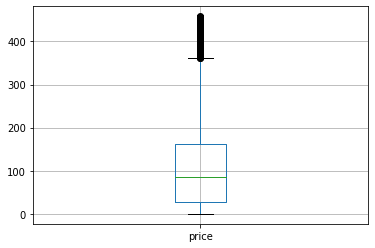

In [ ]:
stat.query("@Q1 - 1.5*@IQR < price < @Q3 + 1.5*@IQR").boxplot(column="price")

In [ ]:
#находим индексы выбросов
blowout_price_id = blowout_price.index

In [ ]:
# Удаяем аномальные наблюдения
df_three = df_three.query("id not in @blowout_price_id").sort_values(by=['id','date'])

In [ ]:
df_three.shape

(98991, 17)

In [ ]:
df_three.sort_values(by=['id']).head()

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y
5,NONE,EX,jamesallen,RD,D,VVS2,EX,EX,19423,202205,13970,"1,05","13304,76","6,67","6,64",59,"3,9175997"
6,NONE,EX,jamesallen,RD,D,VVS2,EX,EX,19423,202206,13970,"1,05","13304,76","6,67","6,64","59,7","3,9640799"
7,NONE,EX,jamesallen,RD,D,VVS2,EX,EX,19423,202207,14550,"1,05","13857,14","6,67","6,64","59,7","3,9640799"
22,NONE,VG,jamesallen,EM SQ,E,VS2,NaN,EX,19504,202205,23140,"2,01","11512,44","7,03","6,7",73,"4,891"
23,NONE,VG,jamesallen,EM SQ,E,VS2,NaN,EX,19504,202206,23140,"2,01","11512,44","7,03","6,7","73,3","4,9111004"


In [ ]:
# в качестве цены возьмем последнее значение по времени (2007 или в некоторых случаях 2006 годы)
df_thee_last_date = df_three.sort_values("date").groupby("id").last().reset_index()
df_thee_last_date.shape

(45655, 17)

In [ ]:
df_thee_last_date.sort_values(by=['id']).head(20)

,id,fluor,symmetry,platform,shape,color,clarity,cut,polish,date,price,carat,price_per_carat,z,x,depth_perc,y
0,19423,NONE,EX,jamesallen,RD,D,VVS2,EX,EX,202207,14550,"1,05","13857,14","6,67","6,64","59,7","3,9640799"
1,19504,NONE,VG,jamesallen,EM SQ,E,VS2,None,EX,202206,23140,"2,01","11512,44","7,03","6,7","73,3","4,9111004"
2,19585,NONE,VG,jamesallen,RAD,K,VS2,None,EX,202207,2180,"0,92","2369,57","5,99","5,23","70,2","3,67146"
3,19599,NONE,VG,jamesallen,RAD,G,VS1,None,VG,202207,5630,1,5630,"6,2","5,27","70,2","3,69954"
4,19605,NONE,G,jamesallen,RAD,D,VS2,None,G,202207,5660,"1,01","5603,96","5,96","5,68","65,3","3,70904"
5,19635,FNT,VG,jamesallen,RAD,E,VS1,None,EX,202207,5690,"1,02","5578,43","5,93","5,14",70,"3,5979998"
6,19637,NONE,VG,jamesallen,RAD,J,VS1,None,EX,202207,3300,"1,02","3235,29","5,86","5,37","70,3","3,7751102"
7,19651,NONE,G,jamesallen,PS,D,SI2,None,G,202207,5060,"1,05","4819,05","8,23","5,66","66,4","3,75824"
8,19656,NONE,G,jamesallen,RAD,D,VS2,None,EX,202207,5600,"1,07","5233,64","5,76","5,51","74,2","4,08842"
9,19699,NONE,G,jamesallen,EM,D,VS2,None,G,202207,12620,"1,5","8413,33","7,31","5,84","68,3","3,9887204"


In [ ]:
df = pd.concat([df_one, df_thee_last_date]).reset_index(drop=True) # соединяем результаты

In [ ]:
df

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y
0,NONE,EX,jamesallen,PS,D,SI2,NaN,EX,14224443,202205,9120,"1,51","6039,74","10,67","6,23",59,"3,6757002"
1,NONE,VG,jamesallen,EM,K,SI2,NaN,VG,12902293,202205,1390,"0,91","1527,47","6,3","4,58",71,"3,2517998"
2,NONE,VG,jamesallen,PS,J,VS1,NaN,VG,12771762,202207,15990,"2,27","7044,05","11,66","7,26","62,2","4,5157204"
3,MED,EX,jamesallen,RD,J,SI2,EX,EX,14584509,202205,3700,"1,01","3663,37","6,37","6,42",62,"3,9804"
4,NONE,EX,jamesallen,RD,G,SI1,EX,EX,14773748,202206,7170,1,7170,"6,3","6,35","63,7","4,04495"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157267,NONE,EX,jamesallen,RD,I,SI1,EX,EX,15409696,202207,6040,"1,01","5980,2","6,46","6,49","60,8","3,9459198"
157268,MED,EX,jamesallen,OV,H,VVS2,None,EX,15410303,202207,6620,"1,01","6554,46","7,76","5,4",65,"3,51"
157269,NONE,VG,jamesallen,EM,D,VS1,None,EX,15410668,202207,14750,"1,5","9833,33","7,84","5,43","65,8","3,57294"
157270,MED,EX,jamesallen,EM,H,SI2,None,EX,15410717,202207,48230,"4,53","10646,8","11,61","7,57","67,5","5,1097503"


In [ ]:
#посмотрим nan в price_per_carat
df['price_per_carat'].isna().sum()

0

In [ ]:
df['carat'] = [x.replace(',', '.') for x in df['carat']]
df['price_per_carat'] = [x.replace(',', '.') for x in df['price_per_carat']]
df['z'] = [x.replace(',', '.') for x in df['z']]       
df['x'] = [x.replace(',', '.') for x in df['x']]
df['depth_perc'] = [x.replace(',', '.') for x in df['depth_perc']]
df['y'] = [x.replace(',', '.') for x in df['y']]
df['carat'] = df['carat'].astype(float)
df['price_per_carat'] = df['price_per_carat'].astype(float)
df['z'] = df['z'].astype(float)
df['x'] = df['x'].astype(float)
df['depth_perc'] = df['depth_perc'].astype(float)
df['y'] = df['y'].astype(float)

In [ ]:
df

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y
0,NONE,EX,jamesallen,PS,D,SI2,NaN,EX,14224443,202205,9120,1.51,6039.74,10.67,6.23,59.0,3.67570
1,NONE,VG,jamesallen,EM,K,SI2,NaN,VG,12902293,202205,1390,0.91,1527.47,6.30,4.58,71.0,3.25180
2,NONE,VG,jamesallen,PS,J,VS1,NaN,VG,12771762,202207,15990,2.27,7044.05,11.66,7.26,62.2,4.51572
3,MED,EX,jamesallen,RD,J,SI2,EX,EX,14584509,202205,3700,1.01,3663.37,6.37,6.42,62.0,3.98040
4,NONE,EX,jamesallen,RD,G,SI1,EX,EX,14773748,202206,7170,1.00,7170.00,6.30,6.35,63.7,4.04495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157267,NONE,EX,jamesallen,RD,I,SI1,EX,EX,15409696,202207,6040,1.01,5980.20,6.46,6.49,60.8,3.94592
157268,MED,EX,jamesallen,OV,H,VVS2,None,EX,15410303,202207,6620,1.01,6554.46,7.76,5.40,65.0,3.51000
157269,NONE,VG,jamesallen,EM,D,VS1,None,EX,15410668,202207,14750,1.50,9833.33,7.84,5.43,65.8,3.57294
157270,MED,EX,jamesallen,EM,H,SI2,None,EX,15410717,202207,48230,4.53,10646.80,11.61,7.57,67.5,5.10975


Цены на бриллианты достаточно сильно меняются, попробуйте вычислить коэффициент инфляции и привести цены к последнему месяцу. Стоит учесть, что цены на все бриллианты не изменяются синхронно, то есть изменение в определенных группах может быть разным.

Определите эти группы и рассчитайте коэффициенты инфляции для каждой из них. Подправьте цены на эти коэффициенты и создайте новую переменную.

In [ ]:
#определяем группы по которым будем отпределять инфляцию . Возьмем 12 каратных групп. Папример камень с размером 1,56 попадет
#в первую каратную группу, а камень с размером 5,9 в 5 группу. Камни с более 12 карат попадают в 12 группу

def categories(row):
        if int(row['carat']) < 1:
            return '0'
        if int(row['carat']) >= 1 and int(row['carat']) < 2 :
            return '1'
        if int(row['carat']) >= 2 and int(row['carat']) < 3 :
            return '2'
        if int(row['carat']) >= 3 and int(row['carat']) < 4 :
            return '3'
        if int(row['carat']) >= 4 and int(row['carat']) < 5 :
            return '4'
        if int(row['carat']) >= 5 and int(row['carat']) < 6 :
            return '5'
        if int(row['carat']) >= 6 and int(row['carat']) < 7 :
            return '6'
        if int(row['carat']) >= 7 and int(row['carat']) < 8 :
            return '7'
        if int(row['carat']) >= 8 and int(row['carat']) < 9 :
            return '8'
        if int(row['carat']) >= 9 and int(row['carat']) < 10 :
            return '9'
        if int(row['carat']) >= 10 and int(row['carat']) < 11 :
            return '10'
        if int(row['carat'])>= 11 and int(row['carat']) < 12 :
            return '11' 
        return '12'
               
df['categories'] = df.apply(categories, axis = 1)    

In [ ]:
df

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y,categories
0,NONE,EX,jamesallen,PS,D,SI2,NaN,EX,14224443,202205,9120,1.51,6039.74,10.67,6.23,59.0,3.67570,1
1,NONE,VG,jamesallen,EM,K,SI2,NaN,VG,12902293,202205,1390,0.91,1527.47,6.30,4.58,71.0,3.25180,0
2,NONE,VG,jamesallen,PS,J,VS1,NaN,VG,12771762,202207,15990,2.27,7044.05,11.66,7.26,62.2,4.51572,2
3,MED,EX,jamesallen,RD,J,SI2,EX,EX,14584509,202205,3700,1.01,3663.37,6.37,6.42,62.0,3.98040,1
4,NONE,EX,jamesallen,RD,G,SI1,EX,EX,14773748,202206,7170,1.00,7170.00,6.30,6.35,63.7,4.04495,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157267,NONE,EX,jamesallen,RD,I,SI1,EX,EX,15409696,202207,6040,1.01,5980.20,6.46,6.49,60.8,3.94592,1
157268,MED,EX,jamesallen,OV,H,VVS2,None,EX,15410303,202207,6620,1.01,6554.46,7.76,5.40,65.0,3.51000,1
157269,NONE,VG,jamesallen,EM,D,VS1,None,EX,15410668,202207,14750,1.50,9833.33,7.84,5.43,65.8,3.57294,1
157270,MED,EX,jamesallen,EM,H,SI2,None,EX,15410717,202207,48230,4.53,10646.80,11.61,7.57,67.5,5.10975,4


In [ ]:
#посмотрим на каждую категорию в разрезе годов и среднего чека за карат
df_index = df.groupby(['date','categories'])[['price_per_carat']]\
                                                                .mean()\
                                                                    .reset_index().sort_values(by=['categories','date']) # индекс цен

In [ ]:
df_index

,date,categories,price_per_carat
0,202205,0,4469.096648
13,202206,0,4423.931777
26,202207,0,4580.487730
1,202205,1,6171.757055
14,202206,1,6200.343745
27,202207,1,6498.322145
2,202205,10,26372.716667
15,202206,10,31517.705556
28,202207,10,33400.827391
3,202205,11,73033.790000


In [ ]:
# за максимальную дату берем  июль 2022 года
date_max = df_index.date.max()
date_max 

202207

In [ ]:
# меняем макисмльную стомость за карат на стоимость из максимального года
df_index = df_index.merge(df_index.query('date == @date_max')[['categories','price_per_carat']].rename(columns={'price_per_carat': 'price_per_carat_max'}),on='categories', how='outer')
df_index

,date,categories,price_per_carat,price_per_carat_max
0,202205,0,4469.096648,4580.487730
1,202206,0,4423.931777,4580.487730
2,202207,0,4580.487730,4580.487730
3,202205,1,6171.757055,6498.322145
4,202206,1,6200.343745,6498.322145
5,202207,1,6498.322145,6498.322145
6,202205,10,26372.716667,33400.827391
7,202206,10,31517.705556,33400.827391
8,202207,10,33400.827391,33400.827391
9,202205,11,73033.790000,NaN


In [ ]:
#т.к. в группе 11 нет данных за 202207 то сделаем в ней максимальные значение за 202206

In [ ]:
df_categories_11 = df[df['categories'] == '11'].query('date == 202206')
df_categories_11

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y,categories
91553,NONE,EX,jamesallen,RD,M,SI1,EX,EX,12257632,202206,176390,11.07,15934.06,14.41,14.51,59.7,8.662470,11
104855,NONE,EX,jamesallen,OV,D,SI2,NaN,EX,14583421,202206,284720,11.06,25743.22,17.22,12.56,63.3,7.950481,11
111451,MED,VG,jamesallen,PS,I,SI1,NaN,EX,10121874,202206,322050,11.88,27108.59,19.97,12.67,62.0,7.855400,11


In [ ]:
mean_cat_11 = df_categories_11['price_per_carat'].mean()
mean_cat_11

22928.623333333333

In [ ]:
# заполняем данные по 11 категории
df_index = df_index.fillna(mean_cat_11)

In [ ]:
df_index

,date,categories,price_per_carat,price_per_carat_max
0,202205,0,4469.096648,4580.487730
1,202206,0,4423.931777,4580.487730
2,202207,0,4580.487730,4580.487730
3,202205,1,6171.757055,6498.322145
4,202206,1,6200.343745,6498.322145
5,202207,1,6498.322145,6498.322145
6,202205,10,26372.716667,33400.827391
7,202206,10,31517.705556,33400.827391
8,202207,10,33400.827391,33400.827391
9,202205,11,73033.790000,22928.623333


In [ ]:
 # вычисляем инфляцию по категориям 
df_index['inflation'] = df_index.price_per_carat_max / df_index.price_per_carat
df_index

,date,categories,price_per_carat,price_per_carat_max,inflation
0,202205,0,4469.096648,4580.487730,1.024925
1,202206,0,4423.931777,4580.487730,1.035388
2,202207,0,4580.487730,4580.487730,1.000000
3,202205,1,6171.757055,6498.322145,1.052913
4,202206,1,6200.343745,6498.322145,1.048058
5,202207,1,6498.322145,6498.322145,1.000000
6,202205,10,26372.716667,33400.827391,1.266492
7,202206,10,31517.705556,33400.827391,1.059748
8,202207,10,33400.827391,33400.827391,1.000000
9,202205,11,73033.790000,22928.623333,0.313945


In [ ]:
df_with_inf = df.merge(df_index[['date'] + ['categories'] + ['inflation']], 
                        on=['date'] + ['categories'], how='left') # соединяем все в одной таблице

df_with_inf

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y,categories,inflation
0,NONE,EX,jamesallen,PS,D,SI2,NaN,EX,14224443,202205,9120,1.51,6039.74,10.67,6.23,59.0,3.67570,1,1.052913
1,NONE,VG,jamesallen,EM,K,SI2,NaN,VG,12902293,202205,1390,0.91,1527.47,6.30,4.58,71.0,3.25180,0,1.024925
2,NONE,VG,jamesallen,PS,J,VS1,NaN,VG,12771762,202207,15990,2.27,7044.05,11.66,7.26,62.2,4.51572,2,1.000000
3,MED,EX,jamesallen,RD,J,SI2,EX,EX,14584509,202205,3700,1.01,3663.37,6.37,6.42,62.0,3.98040,1,1.052913
4,NONE,EX,jamesallen,RD,G,SI1,EX,EX,14773748,202206,7170,1.00,7170.00,6.30,6.35,63.7,4.04495,1,1.048058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157267,NONE,EX,jamesallen,RD,I,SI1,EX,EX,15409696,202207,6040,1.01,5980.20,6.46,6.49,60.8,3.94592,1,1.000000
157268,MED,EX,jamesallen,OV,H,VVS2,None,EX,15410303,202207,6620,1.01,6554.46,7.76,5.40,65.0,3.51000,1,1.000000
157269,NONE,VG,jamesallen,EM,D,VS1,None,EX,15410668,202207,14750,1.50,9833.33,7.84,5.43,65.8,3.57294,1,1.000000
157270,MED,EX,jamesallen,EM,H,SI2,None,EX,15410717,202207,48230,4.53,10646.80,11.61,7.57,67.5,5.10975,4,1.000000


In [ ]:
#####

In [ ]:
#####

In [ ]:
#####

# Задание 2: Модель

Определите функцию потерь (MSE или MAE) и аргументируйте выбор. Попробуйте сделать baseline. Используйте LableEncoder для категориальных фичей и постройте линейную модель.


Так как мы решаем бизнес задачу, то функия потерь MAE для нас будет предпочтительнее, так как она более интерпретируема в реальной жизни. MSE неограничен сверху, и может быть нелегко понять, насколько “хорошим” или “плохим” является то или иное его значение(что мы и увидим в итоге)

In [ ]:
df3 = df_with_inf

In [ ]:
#смотрим категориальные признаки
df3.nunique()[df3.nunique() < 12].index

Index(['fluor', 'symmetry', 'platform', 'shape', 'color', 'clarity', 'cut',
       'polish', 'date'],
      dtype='object')

Описание полей

fluor - флуорисценуия (свойство камня светиться в лучах ультр)
symmetry - показатель симметричности
platform - название платформы, где был размещен камень
quality_group - составной показатель из cut polish symmetry
size_group - каратно весовая группа
big_size_group - каратно-весовая группа
shape - форма
color - цвет
clarity - чистота
cut - качество огранки (может быть только у круглых камней)
polish - полировка
id - номер камня
date - дата
price - цена
carat - кол-во карат
tablepercent - размер площадки по отношению ширине
price_per_carat - цена за карат
z - длина (diameter)
x - ширина
depth_perc - отношение высоты к ширине
y - высота

In [ ]:
df3 = pd.get_dummies(df3, columns=['symmetry', 'platform', 'shape', 'color', 'clarity',
       'polish', 'date'], drop_first=True)
# flour, cut исключим 

In [ ]:
df3

,fluor,cut,id,price,carat,price_per_carat,z,x,depth_perc,y,...,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,polish_G,polish_VG,date_202206,date_202207
0,NONE,NaN,14224443,9120,1.51,6039.74,10.67,6.23,59.0,3.67570,...,0,1,0,0,0,0,0,0,0,0
1,NONE,NaN,12902293,1390,0.91,1527.47,6.30,4.58,71.0,3.25180,...,0,1,0,0,0,0,0,1,0,0
2,NONE,NaN,12771762,15990,2.27,7044.05,11.66,7.26,62.2,4.51572,...,0,0,1,0,0,0,0,1,0,1
3,MED,EX,14584509,3700,1.01,3663.37,6.37,6.42,62.0,3.98040,...,0,1,0,0,0,0,0,0,0,0
4,NONE,EX,14773748,7170,1.00,7170.00,6.30,6.35,63.7,4.04495,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157267,NONE,EX,15409696,6040,1.01,5980.20,6.46,6.49,60.8,3.94592,...,1,0,0,0,0,0,0,0,0,1
157268,MED,None,15410303,6620,1.01,6554.46,7.76,5.40,65.0,3.51000,...,0,0,0,0,0,1,0,0,0,1
157269,NONE,None,15410668,14750,1.50,9833.33,7.84,5.43,65.8,3.57294,...,0,0,1,0,0,0,0,0,0,1
157270,MED,None,15410717,48230,4.53,10646.80,11.61,7.57,67.5,5.10975,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
# смотрим сколько NaN в таблице
df3.isna().sum()

fluor                  7
cut                50861
id                     0
price                  0
carat                  0
price_per_carat        0
z                      0
x                      0
depth_perc             0
y                      0
categories             0
inflation              0
symmetry_G             0
symmetry_No            0
symmetry_VG            0
shape_EM               0
shape_EM SQ            0
shape_HS               0
shape_MQ               0
shape_OV               0
shape_PR               0
shape_PS               0
shape_RAD              0
shape_RD               0
color_E                0
color_F                0
color_G                0
color_H                0
color_I                0
color_J                0
color_K                0
color_L                0
color_M                0
clarity_I1             0
clarity_IF             0
clarity_SI1            0
clarity_SI2            0
clarity_VS1            0
clarity_VS2            0
clarity_VVS1           0


In [ ]:
df3['fluor'].unique()

array(['NONE', 'MED', 'FNT', 'STG', nan, None], dtype=object)

In [ ]:
df3['cut'].unique()

array([nan, 'EX', 'G', 'VG', None], dtype=object)

In [ ]:
df3.cut.replace([None, 'nan'], ['NONE', 'NONE'], inplace=True)

In [ ]:
df3['fluor'].value_counts()

NONE    100898
FNT      30381
MED      15600
STG      10386
Name: fluor, dtype: int64

In [ ]:
df['fluor'].isna().sum()

7

In [ ]:
df3.fluor.replace([None, 'nan'], ['NONE', 'NONE'], inplace=True)

In [ ]:
df3['fluor'].unique()

array(['NONE', 'MED', 'FNT', 'STG'], dtype=object)

In [ ]:
df3['fluor'].isna().sum()

0

In [ ]:
df3['cut'].unique()

array(['NONE', 'EX', 'G', 'VG'], dtype=object)

In [ ]:
# преобразование с помощью LabelEncoder
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
fluor_types = ('NONE', 'MED', 'FNT', 'STG')
fluor_df = pd.DataFrame(fluor_types, columns=['flour_types'])
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
fluor_df['flour_types_stones'] = labelencoder.fit_transform(fluor_df['flour_types'])
fluor_df

,flour_types,flour_types_stones
0,NONE,2
1,MED,1
2,FNT,0
3,STG,3


In [ ]:
keys = fluor_df.flour_types.unique()
values = fluor_df.flour_types_stones.unique()
fluor_dict = dict(zip(keys, values))
print(fluor_dict) 


{'NONE': 2, 'MED': 1, 'FNT': 0, 'STG': 3}


In [ ]:
# то же самое для 'cut'
cut_types = ('NONE', 'EX', 'G', 'VG')
cut_df = pd.DataFrame(cut_types, columns=['cut_types'])
labelencoder = LabelEncoder()
cut_df['cut_types_stones'] = labelencoder.fit_transform(cut_df['cut_types'])
cut_df


,cut_types,cut_types_stones
0,NONE,2
1,EX,0
2,G,1
3,VG,3


In [ ]:
keys2 = cut_df.cut_types.unique()
values2 = cut_df.cut_types_stones.unique()
cut_dict = dict(zip(keys2, values2))
print(cut_dict) 

{'NONE': 2, 'EX': 0, 'G': 1, 'VG': 3}


In [ ]:
df_temp = df3

In [ ]:
df_temp["fluor"] = df_temp["fluor"].map(fluor_dict) # замена значения в столбце fluor

In [ ]:
df_temp["cut"] = df_temp["cut"].map(cut_dict)  # замена значения в столбце cut

In [ ]:
df_temp

,fluor,cut,id,price,carat,price_per_carat,z,x,depth_perc,y,...,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,polish_G,polish_VG,date_202206,date_202207
0,2,2,14224443,9120,1.51,6039.74,10.67,6.23,59.0,3.67570,...,0,1,0,0,0,0,0,0,0,0
1,2,2,12902293,1390,0.91,1527.47,6.30,4.58,71.0,3.25180,...,0,1,0,0,0,0,0,1,0,0
2,2,2,12771762,15990,2.27,7044.05,11.66,7.26,62.2,4.51572,...,0,0,1,0,0,0,0,1,0,1
3,1,0,14584509,3700,1.01,3663.37,6.37,6.42,62.0,3.98040,...,0,1,0,0,0,0,0,0,0,0
4,2,0,14773748,7170,1.00,7170.00,6.30,6.35,63.7,4.04495,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157267,2,0,15409696,6040,1.01,5980.20,6.46,6.49,60.8,3.94592,...,1,0,0,0,0,0,0,0,0,1
157268,1,2,15410303,6620,1.01,6554.46,7.76,5.40,65.0,3.51000,...,0,0,0,0,0,1,0,0,0,1
157269,2,2,15410668,14750,1.50,9833.33,7.84,5.43,65.8,3.57294,...,0,0,1,0,0,0,0,0,0,1
157270,1,2,15410717,48230,4.53,10646.80,11.61,7.57,67.5,5.10975,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
df_work = df_temp

In [ ]:
df_work_normalise = df_temp

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error

X = df_work.drop(columns=["price"])
y = df_work["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=13)

In [ ]:
X

,fluor,cut,id,carat,price_per_carat,z,x,depth_perc,y,categories,...,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,polish_G,polish_VG,date_202206,date_202207
0,2,2,14224443,1.51,6039.74,10.67,6.23,59.0,3.67570,1,...,0,1,0,0,0,0,0,0,0,0
1,2,2,12902293,0.91,1527.47,6.30,4.58,71.0,3.25180,0,...,0,1,0,0,0,0,0,1,0,0
2,2,2,12771762,2.27,7044.05,11.66,7.26,62.2,4.51572,2,...,0,0,1,0,0,0,0,1,0,1
3,1,0,14584509,1.01,3663.37,6.37,6.42,62.0,3.98040,1,...,0,1,0,0,0,0,0,0,0,0
4,2,0,14773748,1.00,7170.00,6.30,6.35,63.7,4.04495,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157267,2,0,15409696,1.01,5980.20,6.46,6.49,60.8,3.94592,1,...,1,0,0,0,0,0,0,0,0,1
157268,1,2,15410303,1.01,6554.46,7.76,5.40,65.0,3.51000,1,...,0,0,0,0,0,1,0,0,0,1
157269,2,2,15410668,1.50,9833.33,7.84,5.43,65.8,3.57294,1,...,0,0,1,0,0,0,0,0,0,1
157270,1,2,15410717,4.53,10646.80,11.61,7.57,67.5,5.10975,4,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
y_pred

array([3422.35892706, 4821.89128946, 4308.51911066, ..., 7373.78720403,
       6512.83709668, 9043.05316736])

In [ ]:
print("MSE", mean_squared_error(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAX ERROR", max_error(y_test, y_pred))
print()
print("TEST STATS", y_test.min(), y_test.mean(), y_test.max())
print("PRED STATS", y_pred.min(), y_pred.mean(), y_pred.max())
print("PRED STATS TRAIN", y_pred_train.min(), y_pred_train.mean(), y_pred_train.max())

MSE 30359803.31763052
MAE 2478.911526353771
MAX ERROR 453446.40927047696

TEST STATS 1020 10276.814900699404 956950
PRED STATS -13120.398043045148 10328.766721662103 503503.59072952304
PRED STATS TRAIN -15338.748369799592 10532.193511318746 2231486.7405438195


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error

print("MSE", mean_squared_error(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAX ERROR", max_error(y_test, y_pred))

MSE 30359803.31763052
MAE 2478.911526353771
MAX ERROR 453446.40927047696



Теперь попробуйте OHE или TargetEncoder (сравните их).

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

from typing import Tuple, List

def OHE(df: pd.DataFrame, columns: List[str]) -> Tuple[pd.DataFrame, List[str]]:
    index = df.index
    one = OneHotEncoder(sparse=False, categories='auto')
    ohe = one.fit_transform(df[columns])
    col_names = one.get_feature_names(input_features = columns)
    df = df.drop(columns, axis=1)
    df = df.reset_index(drop=True)
    df = pd.concat([df, pd.DataFrame(ohe, columns=col_names)], axis = 1)
    df = df.set_index(index)
    return (df, col_names)

scaler = StandardScaler() # Помните, что на тесте делаем только transform

In [ ]:
cat_features = ['fluor','cut']
cat_features

['fluor', 'cut']

In [ ]:
df_work_OHE, cat_col = OHE(df_work, cat_features)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# ненормальзованная модель для OHE сut,fluor
X = df_work_OHE.drop(columns=["price"])
y = df_work_OHE["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=13)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_OHE = model.predict(X_test)
y_pred_train_OHE = model.predict(X_train)

In [ ]:
print("MSE", mean_squared_error(y_test, y_pred_OHE))
print("MAE", mean_absolute_error(y_test, y_pred_OHE))
print("MAX ERROR", max_error(y_test, y_pred_OHE))


MSE 30255838.837478705
MAE 2464.348886503683
MAX ERROR 453083.77383527986



In [ ]:
df_TE = df_work

In [ ]:
df_TE

,fluor,cut,id,price,carat,price_per_carat,z,x,depth_perc,y,...,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,polish_G,polish_VG,date_202206,date_202207
0,2,2,14224443,9120,1.51,6039.74,10.67,6.23,59.0,3.67570,...,0,1,0,0,0,0,0,0,0,0
1,2,2,12902293,1390,0.91,1527.47,6.30,4.58,71.0,3.25180,...,0,1,0,0,0,0,0,1,0,0
2,2,2,12771762,15990,2.27,7044.05,11.66,7.26,62.2,4.51572,...,0,0,1,0,0,0,0,1,0,1
3,1,0,14584509,3700,1.01,3663.37,6.37,6.42,62.0,3.98040,...,0,1,0,0,0,0,0,0,0,0
4,2,0,14773748,7170,1.00,7170.00,6.30,6.35,63.7,4.04495,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157267,2,0,15409696,6040,1.01,5980.20,6.46,6.49,60.8,3.94592,...,1,0,0,0,0,0,0,0,0,1
157268,1,2,15410303,6620,1.01,6554.46,7.76,5.40,65.0,3.51000,...,0,0,0,0,0,1,0,0,0,1
157269,2,2,15410668,14750,1.50,9833.33,7.84,5.43,65.8,3.57294,...,0,0,1,0,0,0,0,0,0,1
157270,1,2,15410717,48230,4.53,10646.80,11.61,7.57,67.5,5.10975,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
# ненормальзованная модель для TargetEncoder сut,fluor для таргетного столбца 'price_per_carat'
import category_encoders as ce
encoder_te = ce.TargetEncoder(cols='fluor') 
df_new_TE = encoder_te.fit_transform(df_TE['fluor'],df_TE['price_per_carat'])

df_new = df_new_TE.join(df_TE.drop('fluor',axis = 1))

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:124: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:129: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [ ]:
encoder_te2 = ce.TargetEncoder(cols='cut') 
df_new2 = encoder_te2.fit_transform(df_new['cut'],df_new['price_per_carat'])

df_TE = df_new2.join(df_new.drop('cut',axis = 1))
df_TE

,cut,fluor,id,price,carat,price_per_carat,z,x,depth_perc,y,...,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,polish_G,polish_VG,date_202206,date_202207
0,5783.254733,6937.870400,14224443,9120,1.51,6039.74,10.67,6.23,59.0,3.67570,...,0,1,0,0,0,0,0,0,0,0
1,5783.254733,6937.870400,12902293,1390,0.91,1527.47,6.30,4.58,71.0,3.25180,...,0,1,0,0,0,0,0,1,0,0
2,5783.254733,6937.870400,12771762,15990,2.27,7044.05,11.66,7.26,62.2,4.51572,...,0,0,1,0,0,0,0,1,0,1
3,7981.582255,6637.480294,14584509,3700,1.01,3663.37,6.37,6.42,62.0,3.98040,...,0,1,0,0,0,0,0,0,0,0
4,7981.582255,6937.870400,14773748,7170,1.00,7170.00,6.30,6.35,63.7,4.04495,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157267,7981.582255,6937.870400,15409696,6040,1.01,5980.20,6.46,6.49,60.8,3.94592,...,1,0,0,0,0,0,0,0,0,1
157268,5783.254733,6637.480294,15410303,6620,1.01,6554.46,7.76,5.40,65.0,3.51000,...,0,0,0,0,0,1,0,0,0,1
157269,5783.254733,6937.870400,15410668,14750,1.50,9833.33,7.84,5.43,65.8,3.57294,...,0,0,1,0,0,0,0,0,0,1
157270,5783.254733,6637.480294,15410717,48230,4.53,10646.80,11.61,7.57,67.5,5.10975,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
# ненормальзованная модель для TEncoder сut,fluor
X = df_TE.drop(columns=["price"])
y = df_TE["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=13)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_TE = model.predict(X_test)
y_pred_train_TE = model.predict(X_train)

In [ ]:
print("MSE", mean_squared_error(y_test, y_pred_TE))
print("MAE", mean_absolute_error(y_test, y_pred_TE))
print("MAX ERROR", max_error(y_test, y_pred_TE))

MSE 30308168.182371
MAE 2471.1615519938478
MAX ERROR 453009.85814386193


Значения Для labelencoder:

MSE 30359803.31763052
MAE 2478.911526353771
MAX ERROR 453446.40927047696
--------------------------
Для TargetEncoder:

MSE 30308168.182371

MAE 2471.1615519938478

MAX ERROR 453009.85814386193

------------------------
Для ONE HOT:

MSE 30255838.837478705

#MAE 2464.348886503683

MAX ERROR 453083.77383527986

Лучший показатель для OHE

Нормализуйте данные.

Поработайте с пропусками (обратите внимание на то, что у fluor возможен пропуск значения, а возможно отсутствие флуоресценции)

Покажите, насколько получилось улучшить результат.

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

names = df_work_normalise.columns
d = scaler.fit_transform(df_work_normalise)

df_work_scaled = pd.DataFrame(d, columns=names)
df_work_scaled.head()

,fluor,cut,id,price,carat,price_per_carat,z,x,depth_perc,y,...,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,polish_G,polish_VG,date_202206,date_202207
0,0.666667,0.666667,0.922459,0.003778,0.036288,0.005252,0.354263,0.177044,0.406250,0.138612,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.666667,0.666667,0.836600,0.000217,0.005184,0.000522,0.102535,0.053263,0.781250,0.086136,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.666667,0.666667,0.828123,0.006944,0.075687,0.006305,0.411290,0.254314,0.506250,0.242602,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.333333,0.000000,0.945841,0.001281,0.010368,0.002761,0.106567,0.191298,0.500000,0.176333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.666667,0.000000,0.958130,0.002880,0.009850,0.006437,0.102535,0.186047,0.553125,0.184323,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_sc = df_work_scaled.drop(columns=["price"])
y_sc = df_work_scaled["price"]

X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_sc, y_sc, test_size=0.17, random_state=13)

In [ ]:
X_test_sc

,fluor,cut,id,carat,price_per_carat,z,x,depth_perc,y,categories,...,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,polish_G,polish_VG,date_202206,date_202207
55628,0.666667,0.666667,0.879027,0.004666,0.002065,0.168203,0.105776,0.612500,0.112366,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19614,0.666667,0.000000,0.766568,0.004666,0.003871,0.088710,0.169542,0.528125,0.160904,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
115514,0.666667,0.666667,0.653867,0.010368,0.001142,0.048387,0.104276,0.743750,0.138090,0.083333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34936,0.666667,0.666667,0.932787,0.004666,0.002718,0.096774,0.060765,0.728125,0.085076,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
60331,0.666667,0.666667,0.916217,0.009850,0.001583,0.175115,0.123781,0.493750,0.105889,0.083333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16516,0.000000,0.666667,0.915770,0.009850,0.004696,0.236751,0.129782,0.531250,0.120328,0.083333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
83292,1.000000,0.000000,0.997962,0.061690,0.006856,0.207949,0.322581,0.446875,0.293455,0.166667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
132910,0.666667,0.000000,0.918815,0.006739,0.002935,0.061060,0.114779,0.634375,0.126790,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16084,0.000000,0.000000,0.964835,0.020218,0.007062,0.128456,0.218305,0.528125,0.211517,0.083333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
model = LinearRegression()

model.fit(X_train_sc, y_train_sc)
y_pred_sc = model.predict(X_test_sc)
y_pred_train_sc = model.predict(X_train_sc)

In [ ]:
print("MSE", mean_squared_error(y_test_sc, y_pred_sc))
print("MAE", mean_absolute_error(y_test_sc, y_pred_sc))
print("MAX ERROR", max_error(y_test_sc, y_pred_sc))
print()
print("TEST STATS", y_test_sc.min(), y_test_sc.mean(), y_test_sc.max())
print("PRED STATS", y_pred_sc.min(), y_pred_sc.mean(), y_pred_sc.max())
print("PRED STATS TRAIN", y_pred_train_sc.min(), y_pred_train_sc.mean(), y_pred_train_sc.max())

MSE 6.445482160700249e-06
MAE 0.0011421923717598289
MAX ERROR 0.20893163155058161

TEST STATS 4.607636697061707e-05 0.00431128037040764 0.4405038911491907
PRED STATS -0.006469305326455087 0.004335217882082371 0.23157225959860908
PRED STATS TRAIN -0.007491440563702333 0.0044289495562011 1.027764116897651


In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 667 kB/s 


Сравните с KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors = 3)

model.fit(X_train_sc, y_train_sc)
y_pred_sc_knn = model.predict(X_test_sc)
y_pred_train_sc_knn = model.predict(X_train_sc)


In [ ]:
print("MSE", mean_squared_error(y_test_sc, y_pred_sc_knn))
print("MAE", mean_absolute_error(y_test_sc, y_pred_sc_knn))
print("MAX ERROR", max_error(y_test_sc, y_pred_sc_knn))
print()
print("TEST STATS", y_test_sc.min(), y_test_sc.mean(), y_test_sc.max())
print("PRED STATS", y_pred_sc_knn.min(), y_pred_sc_knn.mean(), y_pred_sc_knn.max())
print("PRED STATS TRAIN", y_pred_train_sc_knn.min(), y_pred_train_sc_knn.mean(), y_pred_train_sc_knn.max())

MSE 3.374482343131006e-05
MAE 0.0014401688910134064
MAX ERROR 0.3841386714340348

TEST STATS 4.607636697061707e-05 0.00431128037040764 0.4405038911491907
PRED STATS 0.0002933528697129289 0.003725217199009776 0.08946648174684724
PRED STATS TRAIN 0.00020120013577169465 0.004017181170516672 0.4663174078050294


# Классификация

Загрузите датасет bodyPerformance

Описание:

https://www.kaggle.com/datasets/kukuroo3/body-performance-data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = 'drive/MyDrive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_class = pd.read_csv(path + '/Classroom/DS 11 VI/ДЗ-регрессия_классификация/bodyPerformance.csv')

In [ ]:
df_class.head(5)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [ ]:
df_class.shape


(13393, 12)

In [ ]:
df_class.groupby('gender')['gender'].count()


gender
F    4926
M    8467
Name: gender, dtype: int64

In [ ]:
dfb = df_class
dfb2 = df_class

# Задание 1: Определение гендера

Постройте модель, которая будет определять гендер.

Для этого определите две метрики качества, на которые вы будете смотреть. Аргументируйте свой выбор.

После чего преобразуйте категориальные переменные и постройте модель бинарной классификации на основе линейного классификатора и сравните с KNN.

P.S.: не забудте про нормализацию.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dfb['class encoded'] = le.fit_transform(dfb['class'])
dfb['gender encoded'] = le.fit_transform(dfb['gender'])
dfb = dfb.drop(columns=["class","gender"])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# Импортируем метрики качества accuracy, precision и recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

X = dfb.drop(columns=["gender encoded"])
y = dfb["gender encoded"]

X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=13)

In [ ]:
from sklearn.preprocessing import StandardScaler

names = X.columns

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X = pd.DataFrame(scaled_data, columns=names)
X.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class encoded
0,-0.717432,0.443873,0.652150,-0.267367,0.112009,-0.015959,1.688190,0.377317,1.416961,0.674009,0.447033
1,-0.864220,-0.422465,-0.974734,-1.039081,-0.167278,-0.287820,-0.053073,0.128984,0.926634,0.975013,-1.341768
2,-0.423857,1.310211,0.883127,-0.432734,1.229158,1.479276,0.737554,-0.379509,0.646446,-0.229005,0.447033
3,-0.350463,0.704961,0.305684,-0.667004,-0.260374,1.139450,0.417538,-0.001096,0.926634,0.724176,-0.447367
4,-0.644038,0.621888,0.021147,-0.846152,-0.818948,-0.219855,0.615195,1.406129,0.366259,0.674009,-0.447367


In [ ]:
logreg_clf = LogisticRegression(solver='liblinear')

In [ ]:
logreg_clf.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred=logreg_clf.predict(X_test) 

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 

Text(0.5, 257.44, 'Predicted label')

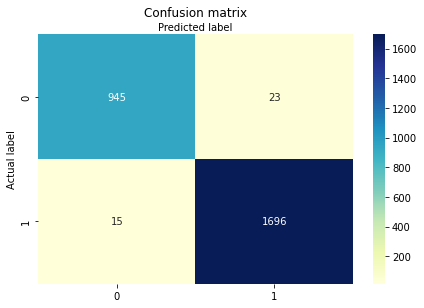

In [ ]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 
print("Precision:",metrics.precision_score(y_test, y_pred)) 
print("Recall:",metrics.recall_score(y_test, y_pred)) 

Accuracy: 0.9858156028368794
Precision: 0.9866201279813845
Recall: 0.9912331969608417


In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


logreg_prediction = logreg_clf.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)

# Оценка точности — простейший вариант оценки работы классификатора
print(accuracy_score(logreg_prediction, y_test))
print(accuracy_score(KNN_prediction, y_test))
# Но матрица неточности и отчёт о классификации дадут больше информации о производительности
print(confusion_matrix(logreg_prediction, y_test))
print(classification_report(KNN_prediction, y_test))

0.9858156028368794
0.9861888764464353
[[ 945   15]
 [  23 1696]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       967
           1       0.99      0.99      0.99      1712

    accuracy                           0.99      2679
   macro avg       0.98      0.99      0.99      2679
weighted avg       0.99      0.99      0.99      2679



# Задание 2: Определение класса

Теперь опробуем построить модель, которая будет предсказывать class физической формы.

Для этого определите метрики качества для задачи мультиклассификации (аргументируйте выбор).

Постройте модель мультиклассовой классификации на основе линейного классификатора и сравните с KNN.

In [ ]:
import matplotlib
import seaborn as sns

In [ ]:
dfb2.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [ ]:
# закодируем значения  class
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
enc.fit(dfb2['class'])
dfb2['class'] = enc.transform(dfb2['class'])

In [ ]:
# закодируем значения  gender
enc.fit(dfb2['gender'])
dfb2['gender'] = enc.transform(dfb2['gender'])

In [ ]:
# скалируем данные
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

dfb_scaled_temp = dfb2.drop(columns = ['class'],axis = 1)

names = ['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm']
d = scaler.fit_transform(dfb_scaled_temp)

dfb_scaled_temp = pd.DataFrame(d, columns=names)
dfb_scaled = dfb_scaled_temp.join(dfb2['class'])

In [ ]:
dfb_scaled

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,0.139535,1.0,0.687500,0.437746,0.242706,0.512164,0.646766,0.778723,0.182353,0.7500,0.716172,2
1,0.093023,1.0,0.581395,0.263864,0.168435,0.492958,0.626866,0.516312,0.173529,0.6625,0.755776,0
2,0.232558,1.0,0.793605,0.462433,0.226790,0.588988,0.756219,0.635461,0.155462,0.6125,0.597360,2
3,0.255814,1.0,0.719477,0.400716,0.204244,0.486556,0.731343,0.587234,0.168908,0.6625,0.722772,1
4,0.162791,1.0,0.709302,0.370304,0.187003,0.448143,0.631841,0.617021,0.218908,0.5625,0.716172,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,0.093023,1.0,0.684593,0.406977,0.175066,0.473752,0.701493,0.507801,0.178151,0.5875,0.653465,2
13389,0.000000,1.0,0.795058,0.336315,0.120690,0.473752,0.636816,0.468085,0.109664,0.6000,0.551155,3
13390,0.418605,1.0,0.758721,0.484794,0.226790,0.499360,0.656716,0.900709,0.173950,0.5625,0.755776,0
13391,1.000000,0.0,0.306686,0.280859,0.496021,0.435339,0.601990,0.273759,0.143697,0.0000,0.247525,3


In [ ]:
X = dfb_scaled.drop(columns=["class"]) # укажите новый таргет
y = dfb_scaled["class"]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.1, random_state=13)

In [ ]:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
#sns.pairplot(dfb_scaled, hue="class")

In [ ]:
# KNN logreg классификаторы на датасете
dfb_clf_knn = KNeighborsClassifier().fit(X_train, y_train)
dfb_log_reg = LogisticRegression(random_state=0, n_jobs=-1).fit(X_train, y_train)

In [ ]:
# предсказываем
dfb_y_knn = dfb_clf_knn.predict(X_test)
dfb_y_log_reg = dfb_log_reg.predict(X_test)


dfb_y_knn_proba = dfb_clf_knn.predict_proba(X_test)
dfb_y_log_reg_proba = dfb_log_reg.predict_proba(X_test)

In [ ]:
dfb_y_log_reg_proba

array([[0.32170508, 0.32242392, 0.27737207, 0.07849893],
       [0.04775168, 0.2068186 , 0.35510547, 0.39032425],
       [0.74379873, 0.21049838, 0.04348356, 0.00221933],
       ...,
       [0.44218991, 0.35316551, 0.17844581, 0.02619876],
       [0.75491198, 0.20347737, 0.04001903, 0.00159162],
       [0.37918361, 0.37470692, 0.19955138, 0.04655809]])

Text(0.5, 46.0, 'Predicted value')

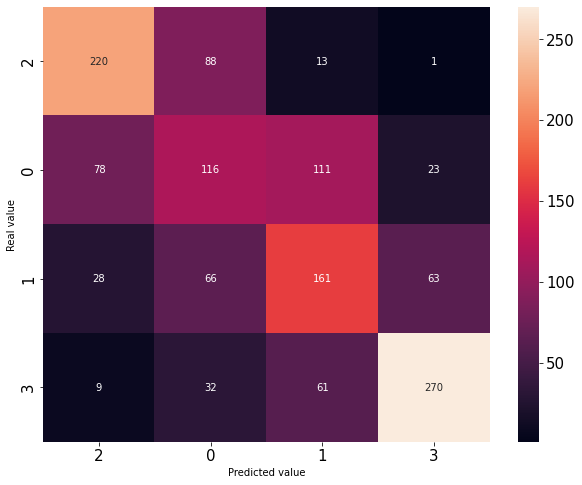

In [ ]:
mp_mtx = metrics.confusion_matrix(y_test, dfb_y_log_reg)

fig = plt.figure(figsize=(10,8))
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
sns.heatmap(mp_mtx, annot=True, fmt="d", 
            xticklabels=dfb_scaled["class"].unique(), 
            yticklabels=dfb_scaled["class"].unique())
plt.ylabel("Real value")
plt.xlabel("Predicted value")

Усредняем элементы матрицы ошибок (TP, FP, TN, FN) между бинарными классификаторами, например TP=1K∑Ki=1TPi. Затем по одной усреднённой матрице ошибок считаем Precision, Recall, F-меру. Это называют микроусреднением.
Считаем Precision, Recall для каждого классификатора отдельно, а потом усредняем. Это называют макроусреднением.

In [ ]:
metrics.recall_score(y_test, dfb_y_log_reg, average='macro')

0.5672460275097415

In [ ]:
metrics.recall_score(y_test, dfb_y_log_reg, average='macro')

0.5672460275097415

In [ ]:
metrics.recall_score(y_test, dfb_y_log_reg, average='micro')

0.5723880597014925

In [ ]:
print('F1 для kNN:')
print ('macro = ', metrics.f1_score(y_test, dfb_y_log_reg, average='macro'), ', micro = ', metrics.f1_score(y_test, dfb_y_log_reg, average='micro'))

# 
print('\nF1 для log reg:')
print ('macro = ', metrics.f1_score(y_test, dfb_y_log_reg, average='macro'), ', micro = ', metrics.f1_score(y_test, dfb_y_log_reg, average='micro'))

F1 для kNN:
macro =  0.5659113186819904 , micro =  0.5723880597014925

F1 для log reg:
macro =  0.5659113186819904 , micro =  0.5723880597014925


In [ ]:
metrics.roc_auc_score(y_test, dfb_y_log_reg_proba, multi_class='ovo')

0.8256176246310529

In [ ]:
metrics.roc_auc_score(y_test, dfb_y_log_reg_proba, multi_class='ovr')

0.8282493559924589

In [ ]:
metrics.roc_auc_score(y_test, dfb_y_log_reg_proba, multi_class='ovo', average='macro')

0.8256176246310529

In [ ]:
metrics.roc_auc_score(y_test, dfb_y_log_reg_proba, multi_class='ovo', average='weighted')

0.8277643206733786